In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mypackage.pipeline import validateParams, runPipeline, find_outliers_z

In [50]:
df = pd.read_csv("FloridaBikeRentals.csv")
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [51]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.head()

df['Day'] = df['Date'].dt.day
df['Month Num'] = df['Date'].dt.month
df['Month'] = df['Date'].dt.month_name()
df['Day of Week'] = df['Date'].dt.day_name()
df['Day of Num'] = df['Date'].dt.day_of_week
df['Weekend_Bool'] = df['Day of Week'].isin(['Saturday', 'Sunday']).astype(int)
df['Weekend/Weekday'] = np.where(df['Day of Week'].isin(['Saturday', 'Sunday']), 'Weekend', 'Weekday')


df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),...,Seasons,Holiday,Functioning Day,Day,Month Num,Month,Day of Week,Day of Num,Weekend_Bool,Weekend/Weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,Winter,No Holiday,Yes,1,12,December,Friday,4,0,Weekday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,Winter,No Holiday,Yes,1,12,December,Friday,4,0,Weekday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,Winter,No Holiday,Yes,1,12,December,Friday,4,0,Weekday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,Winter,No Holiday,Yes,1,12,December,Friday,4,0,Weekday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,Winter,No Holiday,Yes,1,12,December,Friday,4,0,Weekday


In [52]:
df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(exclude=[np.number,np.datetime64])

# Compute the correlation matrix (or you can use your own matrix)
corr = df_num.corr()

# Create an interactive heatmap
fig = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.columns,
    colorscale='Viridis'
))


# Adjust figure size here (in pixels)
fig.update_layout(
    title='Interactive Correlation Heatmap',
    width=800,   # width in pixels
    height=600   # height in pixels
)

fig.show()

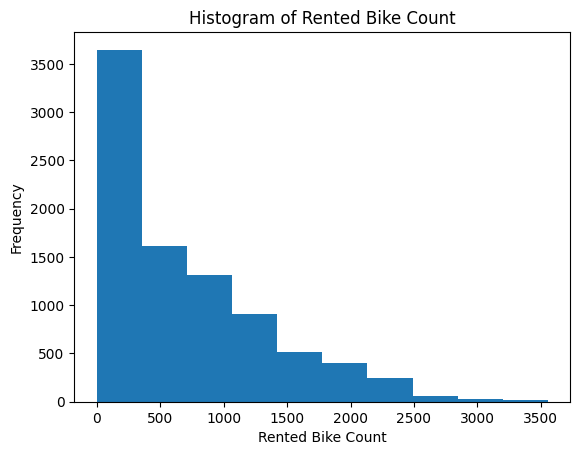

In [53]:
plt.hist(df['Rented Bike Count'])
plt.title('Histogram of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

In [54]:
df_cat

,Seasons,Holiday,Functioning Day,Month,Day of Week,Weekend/Weekday
0,Winter,No Holiday,Yes,December,Friday,Weekday
1,Winter,No Holiday,Yes,December,Friday,Weekday
2,Winter,No Holiday,Yes,December,Friday,Weekday
3,Winter,No Holiday,Yes,December,Friday,Weekday
4,Winter,No Holiday,Yes,December,Friday,Weekday
...,...,...,...,...,...,...
8755,Autumn,No Holiday,Yes,November,Friday,Weekday
8756,Autumn,No Holiday,Yes,November,Friday,Weekday
8757,Autumn,No Holiday,Yes,November,Friday,Weekday
8758,Autumn,No Holiday,Yes,November,Friday,Weekday


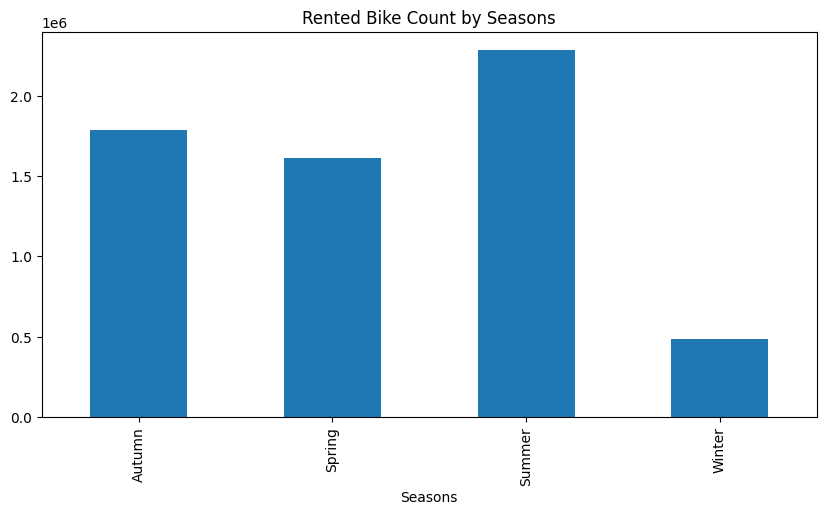

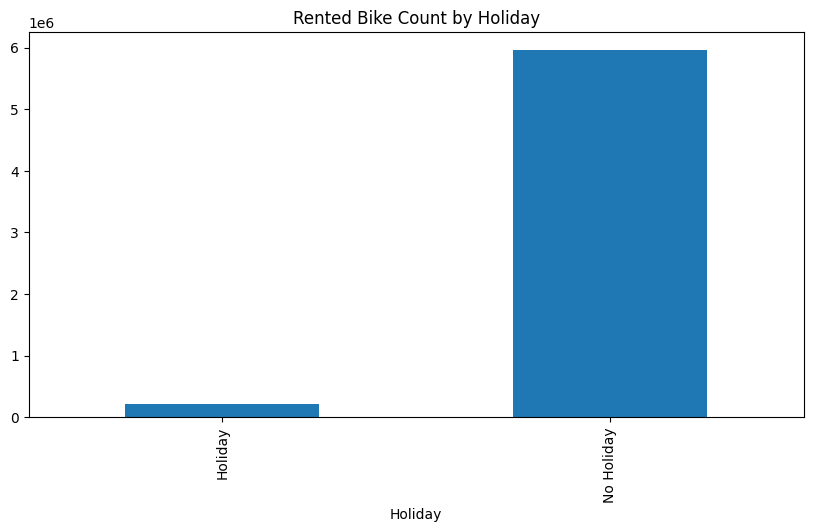

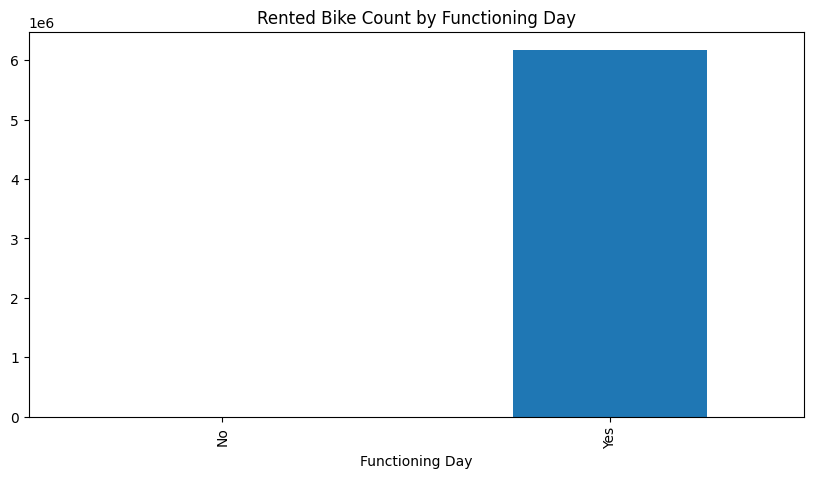

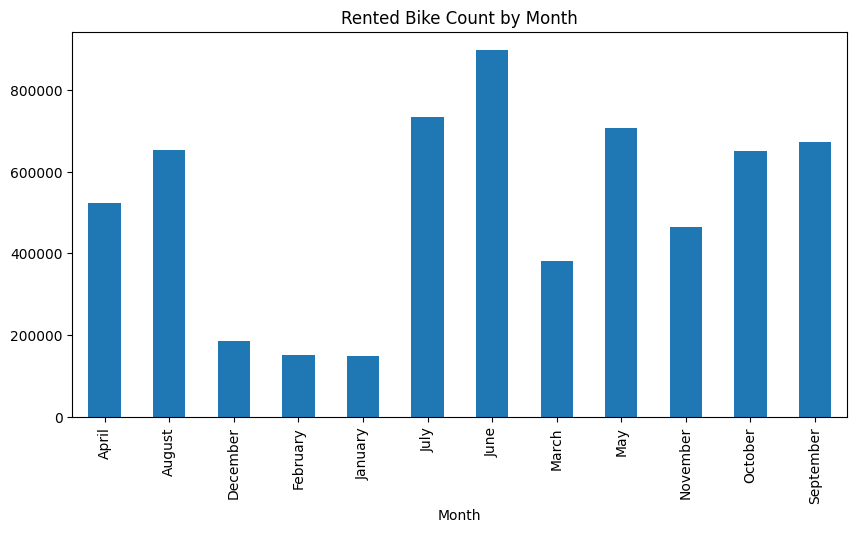

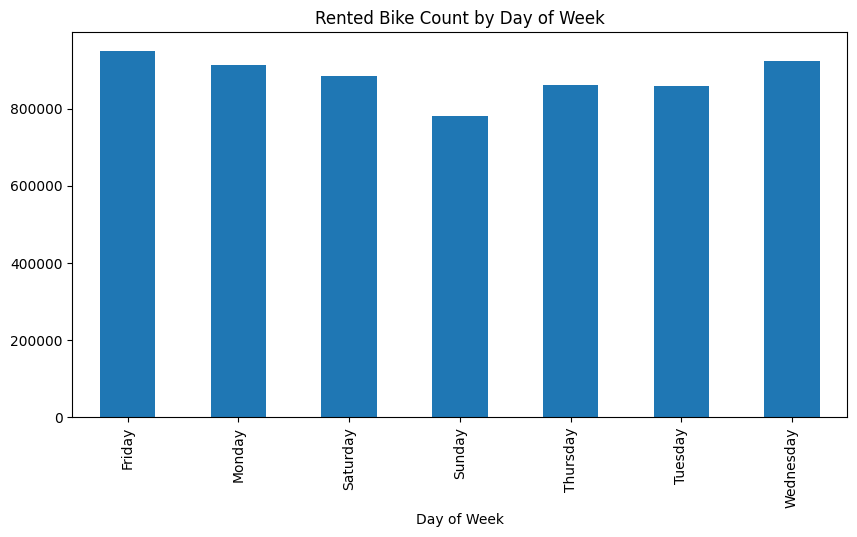

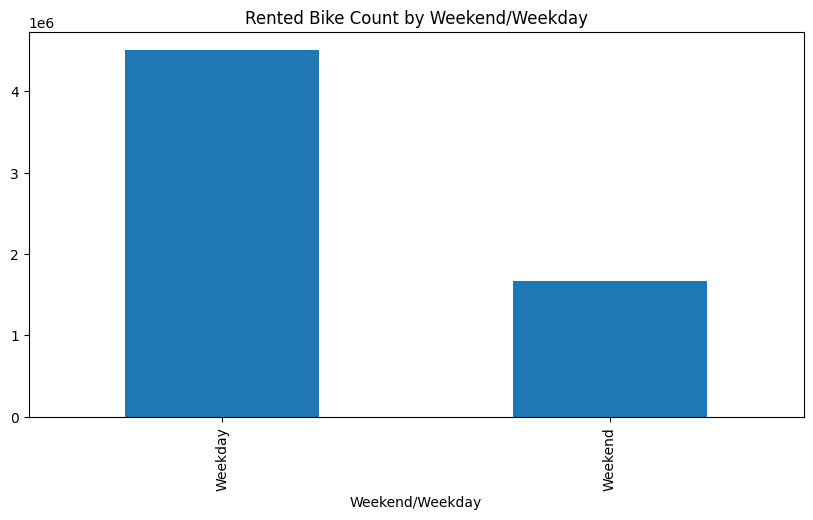

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64

In [65]:
groups = []
titles = []
for col in df_cat.columns:
    title = f'Rented Bike Count by {col}'
    group_df = df['Rented Bike Count'].groupby(df[col]).sum()
    
    groups.append(group_df)
    titles.append(title)

    plt.boxplot = group_df.plot(kind='bar', title=title, figsize=(10, 5))
    plt.show()

groups[2]